<a href="https://colab.research.google.com/github/gaddammansi/FMML_Project-and-Labs-/blob/main/module_4_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
##  QUESTION 1)Change batch size in mini-batch gradient descent.

##  ANSWER :-

#To change the batch size in your minibatch_gradient_descent function, you can simply pass the desired batch_size parameter when calling the function.


def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=32):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history



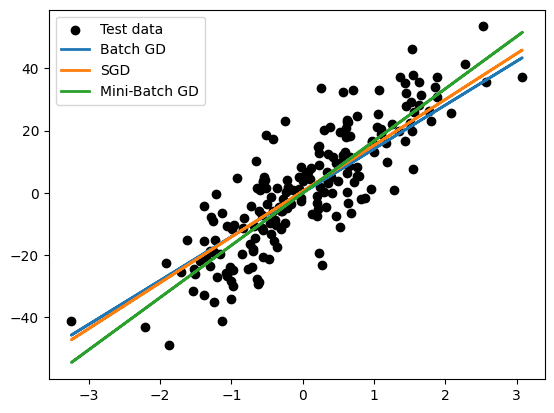

In [9]:
##  QUESTION 2)Test all the three out on real datasets.

##  ANSWER :-

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)

    for iteration in range(iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

    return theta

# Stochastic Gradient Descent (SGD)
def sgd(X, y, learning_rate=0.01, iterations=100, batch_size=1):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)

    for iteration in range(iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_b_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]

            gradients = 2/batch_size * X_i.T.dot(X_i.dot(theta) - y_i)
            theta = theta - learning_rate * gradients

    return theta

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.01, iterations=100, batch_size=20):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)

    for iteration in range(iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_b_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]

            gradients = 2/batch_size * X_i.T.dot(X_i.dot(theta) - y_i)
            theta = theta - learning_rate * gradients

    return theta

# Fit models
theta_batch = batch_gradient_descent(X_train, y_train.reshape(-1, 1))
theta_sgd = sgd(X_train, y_train.reshape(-1, 1), batch_size=1)
theta_mini_batch = mini_batch_gradient_descent(X_train, y_train.reshape(-1, 1), batch_size=20)

# Plot results
plt.scatter(X_test, y_test, color='black', label='Test data')
plt.plot(X_test, np.c_[np.ones((len(X_test), 1)), X_test].dot(theta_batch), label='Batch GD', linewidth=2)
plt.plot(X_test, np.c_[np.ones((len(X_test), 1)), X_test].dot(theta_sgd), label='SGD', linewidth=2)
plt.plot(X_test, np.c_[np.ones((len(X_test), 1)), X_test].dot(theta_mini_batch), label='Mini-Batch GD', linewidth=2)
plt.legend()
plt.show()


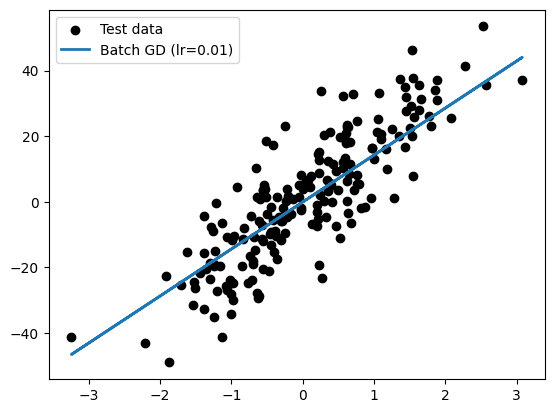

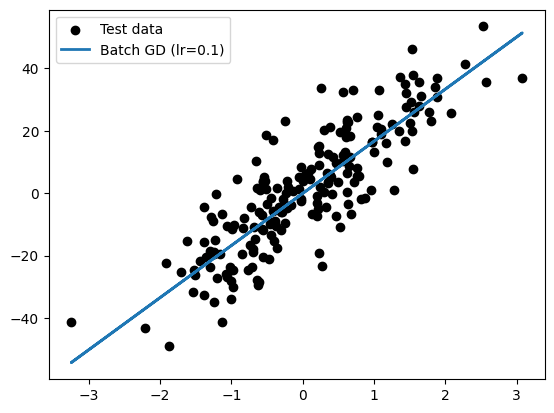

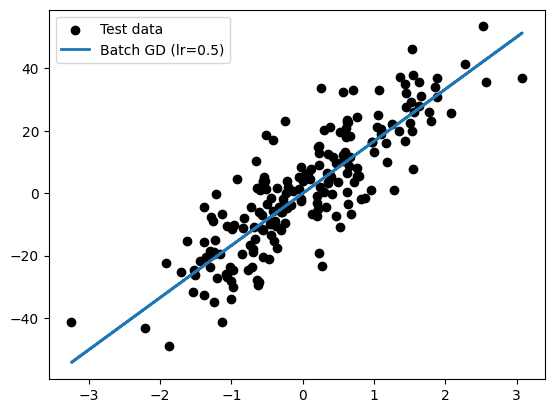

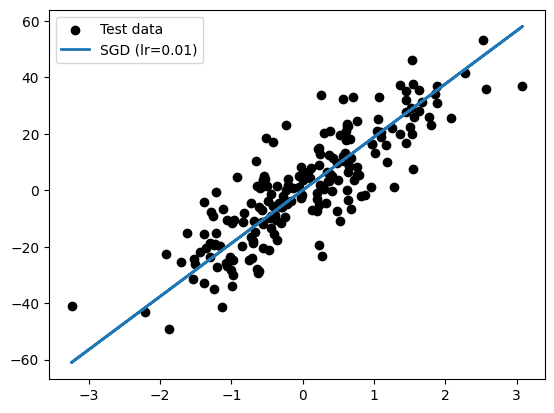

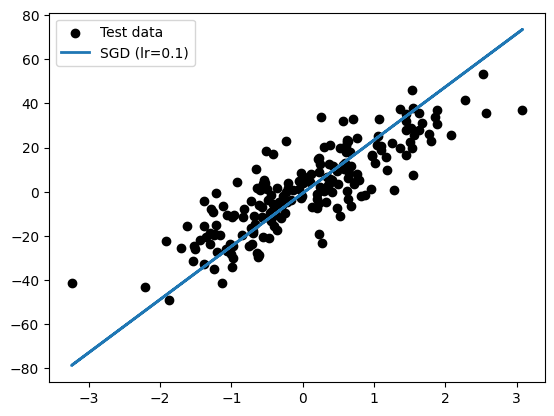

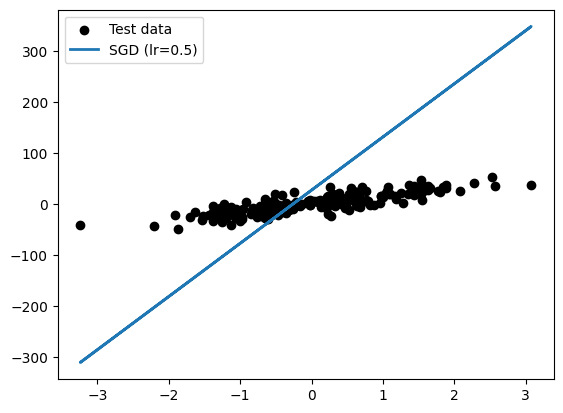

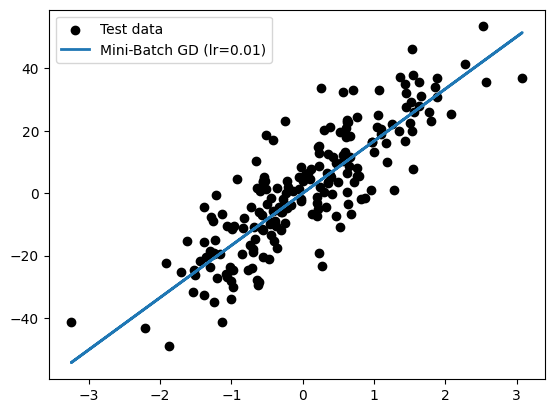

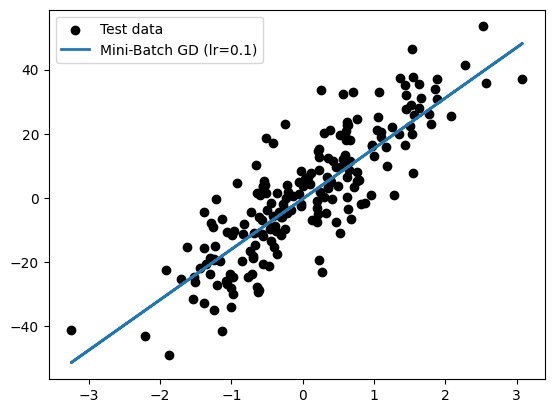

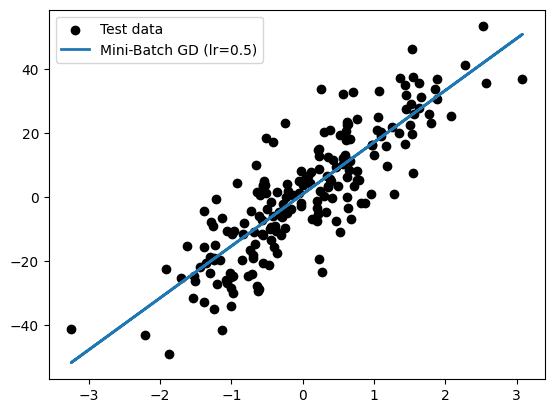

In [10]:
##  QUESTION 3)Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD

##  ANSWER :-
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)

    for iteration in range(iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

    return theta

# Function to perform Stochastic Gradient Descent (SGD)
def sgd(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)

    for iteration in range(iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(m):
            X_i = X_b_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]

            gradients = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta = theta - learning_rate * gradients

    return theta

# Function to perform Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.01, iterations=100, batch_size=20):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(n + 1, 1)

    for iteration in range(iterations):
        indices = np.random.permutation(m)
        X_b_shuffled = X_b[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_b_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]

            gradients = 2/batch_size * X_i.T.dot(X_i.dot(theta) - y_i)
            theta = theta - learning_rate * gradients

    return theta

# Function to plot the results
def plot_results(X_test, y_test, theta, label):
    plt.scatter(X_test, y_test, color='black', label='Test data')
    plt.plot(X_test, np.c_[np.ones((len(X_test), 1)), X_test].dot(theta), label=label, linewidth=2)
    plt.legend()
    plt.show()

# Learning rates to compare
learning_rates = [0.01, 0.1, 0.5]

# Perform and plot Batch GD with different learning rates
for lr in learning_rates:
    theta_batch = batch_gradient_descent(X_train, y_train.reshape(-1, 1), learning_rate=lr, iterations=100)
    plot_results(X_test, y_test, theta_batch, f'Batch GD (lr={lr})')

# Perform and plot SGD with different learning rates
for lr in learning_rates:
    theta_sgd = sgd(X_train, y_train.reshape(-1, 1), learning_rate=lr, iterations=100)
    plot_results(X_test, y_test, theta_sgd, f'SGD (lr={lr})')

# Perform and plot Mini-Batch GD with different learning rates
for lr in learning_rates:
    theta_mini_batch = mini_batch_gradient_descent(X_train, y_train.reshape(-1, 1), learning_rate=lr, iterations=100, batch_size=20)
    plot_results(X_test, y_test, theta_mini_batch, f'Mini-Batch GD (lr={lr})')
